In [78]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline


In [79]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

TensorFlow kütüphanesi altında yer alan Keras modülünden MNIST veri kümesini yüklemek için kullanılır. MNIST, el yazısı rakamlarını içeren bir veri kümesidir ve makine öğrenimi modellerinin eğitilmesi için sıklıkla kullanılır. load_data fonksiyonu, veri kümesini indirir ve yükler. Bu kodun çalışması için TensorFlow kütüphanesinin bilgisayarınızda yüklü ve kurulu olması gereklidir.


load_data işlevi, MNIST veri kümesini doğrudan bilgisayarınıza indirmez. Bu işlev, MNIST veri kümesini yüklemek için internet üzerinden verilere erişir. Eğer daha önce bu veri kümesini bilgisayarınıza indirmediyseniz, bu işlev, verileri otomatik olarak indirip geçici bir bellek bölgesine (RAM) yükler.

In [80]:
(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

MNIST veri kümesinden yüklenen verileri eğitim ve test veri setlerine ayırmak için kullanılır. load_data() fonksiyonu, MNIST veri kümesini yükler ve bu satırda eğitim verileri (X_train, y_train) ve test verileri (X_test, y_test) olarak ayrıştırılır. X_train ve X_test verileri, resimlerin piksel değerlerini içeren 3 boyutlu tensörlerdir. y_train ve y_test verileri ise, resimlerin doğru sınıf etiketlerini içeren 1 boyutlu tensörlerdir.

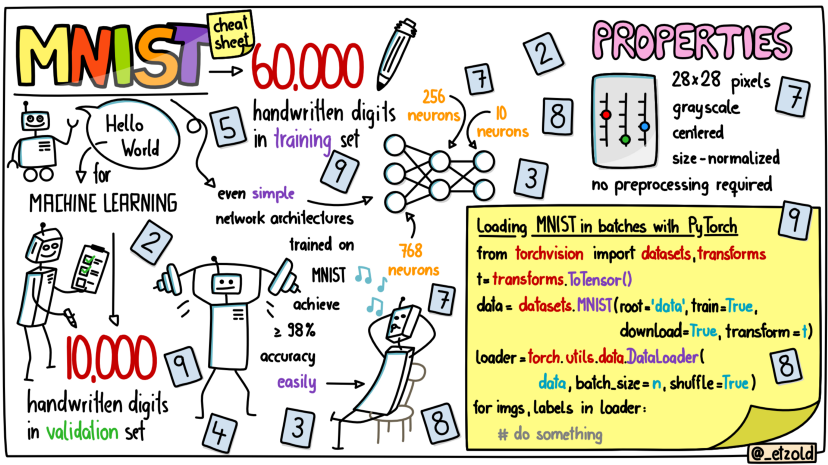

In [4]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


X_train ve y_train verilerinin şeklini ekrana yazdırır. X_train.shape ifadesi, eğitim verilerinin şeklini 3 boyutlu bir tensör olarak döndürür. Bu tensörün ilk boyutu, eğitim örneklerinin sayısıdır. İkinci ve üçüncü boyutlar, resimlerin yüksekliği ve genişliği olarak düzenlenmiştir. y_train.shape ifadesi ise, y_train verilerinin şeklini 1 boyutlu bir tensör olarak döndürür. Bu tensörün boyutu, eğitim örneklerinin sayısıdır. Her bir öğe, eşleşen örnek için doğru sınıf etiketini içerir. Bu kodun çıktısı, eğitim verilerinin şeklini ve etiketlerinin şeklini belirtir.

In [5]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


X_test tensörü, MNIST veri kümesindeki test örneklerinin görüntülerini içerir. Bu görüntüler siyah beyaz olduğundan (grayscale), her biri yalnızca bir kanala (channel) sahiptir ve bu nedenle üçüncü boyutu yoktur. Bu yüzden X_test tensörü (10000, 28, 28) şeklindedir, yani 10.000 test örneği, her biri 28x28 boyutlarında bir siyah beyaz görüntü içerir.

Bununla birlikte, eğer resimler renkli (RGB) olsaydı, her pikselin kırmızı, yeşil ve mavi kanalları olacaktı. Bu durumda, X_test tensörü üçüncü boyuta sahip olacaktı ve şekli (10000, 28, 28, 3) olacaktı.

MNIST veri kümesi, rakamların el yazısı ile yazılmış görüntülerini içerir. Bu görüntülerin sınıflandırması, yani hangi rakamın hangi görüntüye karşılık geldiğini belirleme problemi, bir dizi sınıflandırma probleminin örneğidir. MNIST veri kümesinde, her görüntü yalnızca bir rakam içerir. Bu nedenle, her bir görüntü yalnızca bir sınıfa aittir ve y_train ve y_test tensörleri, her bir görüntünün ait olduğu tek bir sınıf etiketini içerir.

y_train tensörünün boyutu, eğitim setindeki örnek sayısıdır. Örneğin, eğitim setinde 50.000 örnek varsa, y_train tensörü 50.000 boyutunda olacaktır. Her bir öğe, eşleşen örneğin doğru sınıf etiketini belirtir. y_train tensörü tek boyutlu bir tensördür, çünkü her bir öğe yalnızca bir sınıf etiketini içerir. Yani her bir öğe, örneğin "Bu görüntü 5 rakamını temsil eder" şeklinde bir bilgi içerir. Dolayısıyla, y_train tensörü tek boyutlu bir şekilde tanımlanabilir.

In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [8]:
# Checking the shape of one image
X_train[69].shape

(28, 28)

In [10]:
X_train[69]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203,
        254, 252, 252, 252, 214,  51,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

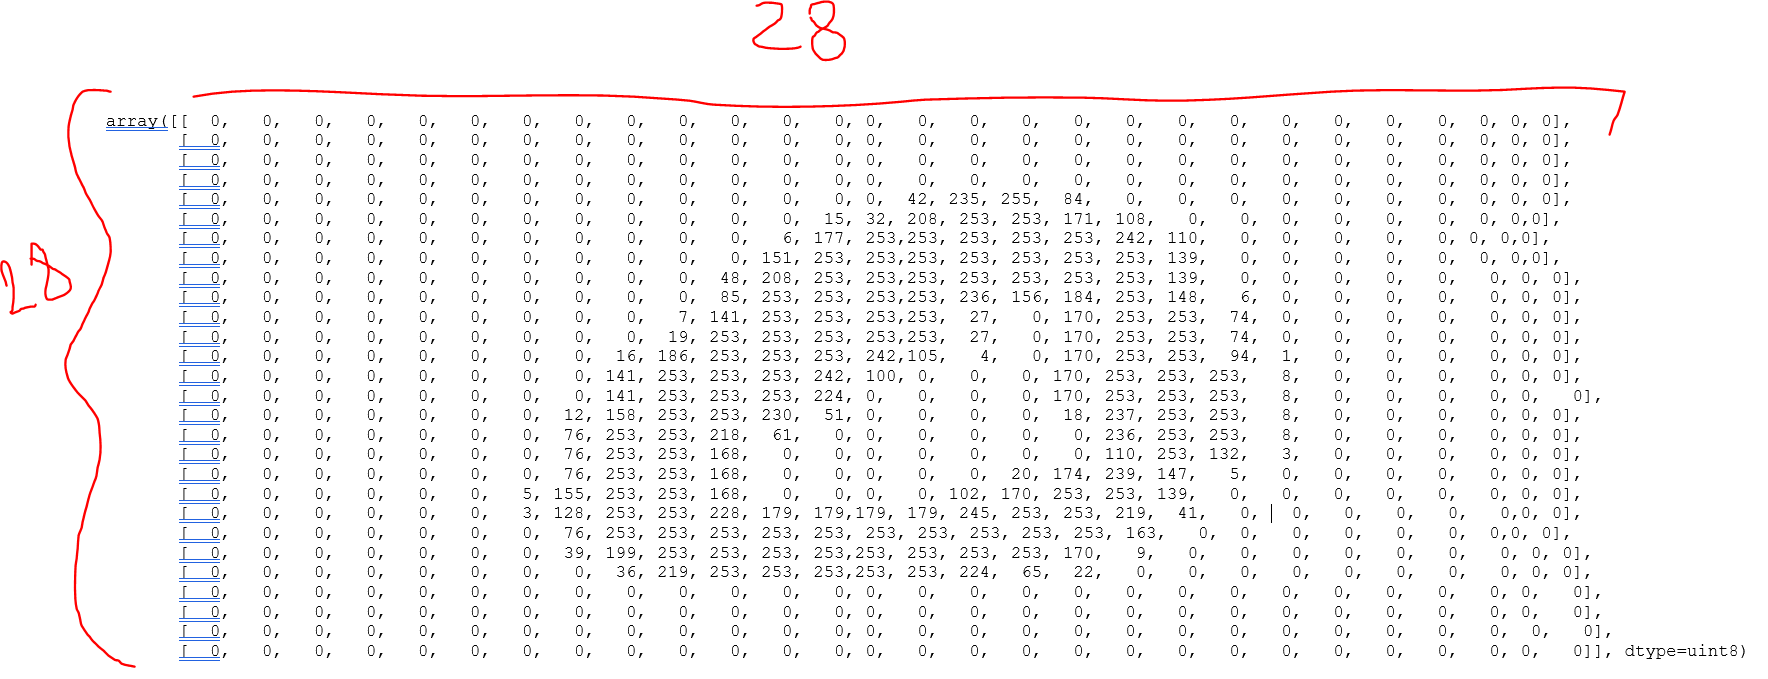

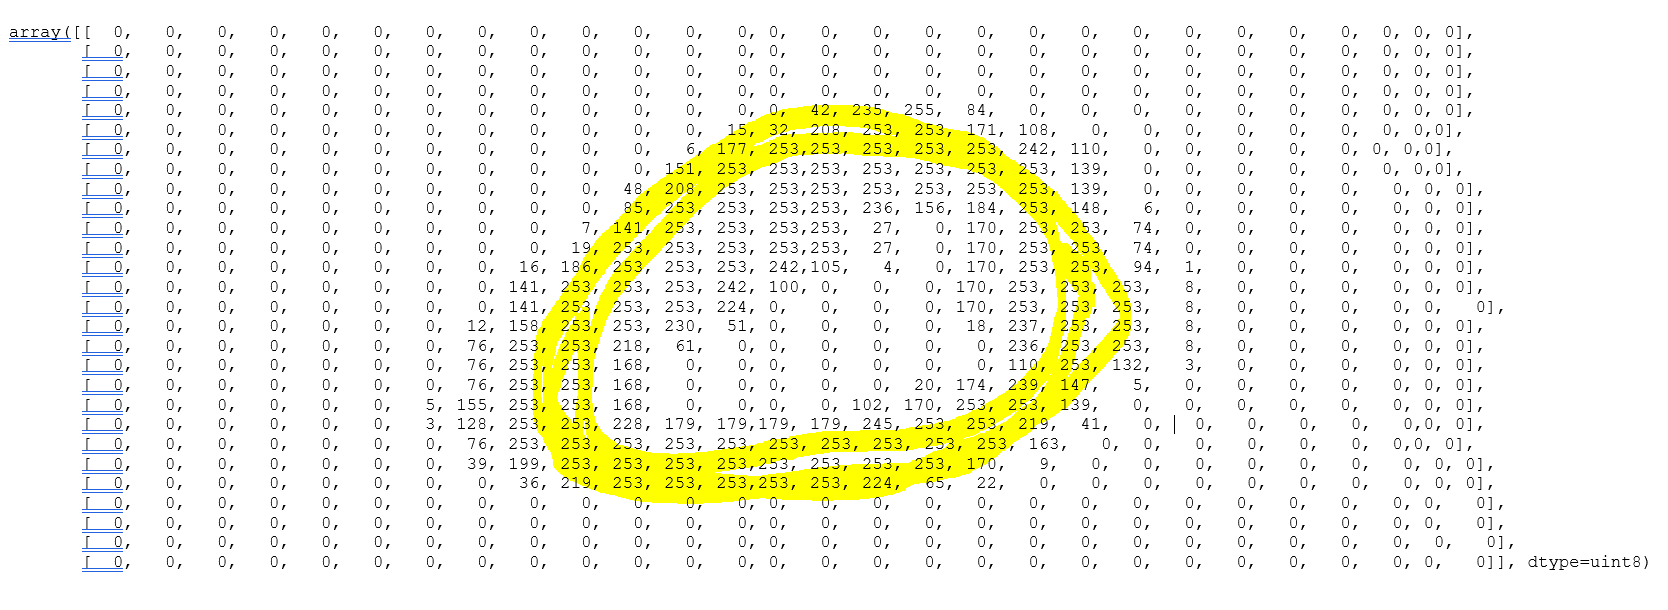

In [11]:
import matplotlib.pyplot as plt

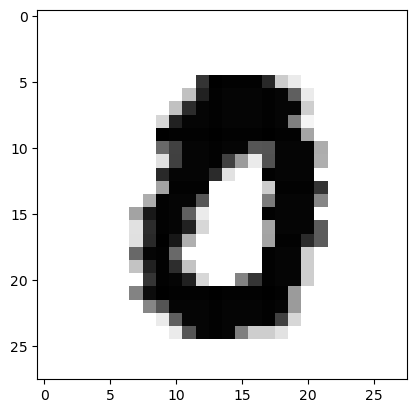

In [12]:
plt.imshow(X_train[69], cmap= plt.cm.binary)

cmap= plt.cm.binary parametresi, siyah beyaz bir görüntü elde etmek için kullanılan bir renk haritası (color map) belirtir.

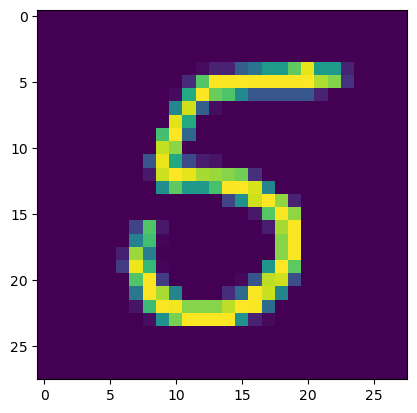

In [13]:
plt.imshow(X_train[768])

In [14]:
X_train[768]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,
         24,  24,  77,  98, 139, 139, 192, 245, 139, 139,  25,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30, 187,
        253, 253, 254, 253, 253, 253, 253, 254, 224, 207,  37,   0,   0,
          0,   0],
       [  

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Bu kod bloğu, MNIST veri kümesinden rastgele seçilen 3 satır ve 6 sütun boyutunda bir alt örneklem oluşturur. Daha sonra, alt örneklemdeki her örneğin etiketini (y_train) ve görüntüsünü (X_train) görüntüler.

f, ax = plt.subplots(3, 6, figsize=(12,5),... satırı, alt örneklem için 3 satır ve 6 sütundan oluşan bir alt grafik oluşturur ve ax değişkeninde saklar. gridspec_kw argümanı, alt grafiğin satır ve sütunları arasındaki boşlukları ayarlar. squeeze=True argümanı, alt grafiklerin ekstra boyutunu kaldırır ve sadece satır ve sütun boyutlarını bırakır.

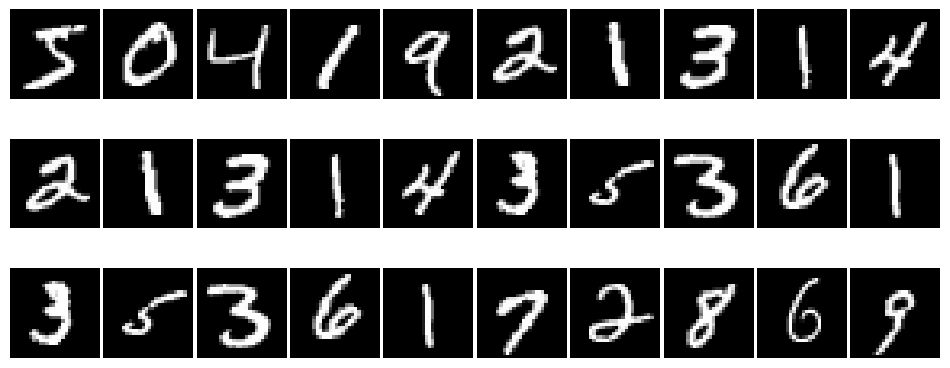

In [18]:
num_rows, num_cols = 3, 10       # Datadan 3 tane row, 6 tane column sectik.
f, ax = plt.subplots(3, 10, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
plt.show()
plt.close()

C:\Users\bulen\AppData\Local\Temp\ipykernel_26440\3924017328.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


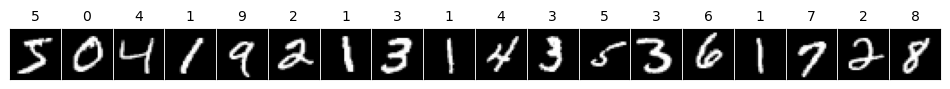

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=18, figsize=(12,5),
                         gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                         squeeze=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(str(y_train[i]), fontsize=10)
    
plt.tight_layout()
plt.show()

## Data Preprocessing

In [22]:
X_train[9].min()

0

In [23]:
X_train[9].max()

255

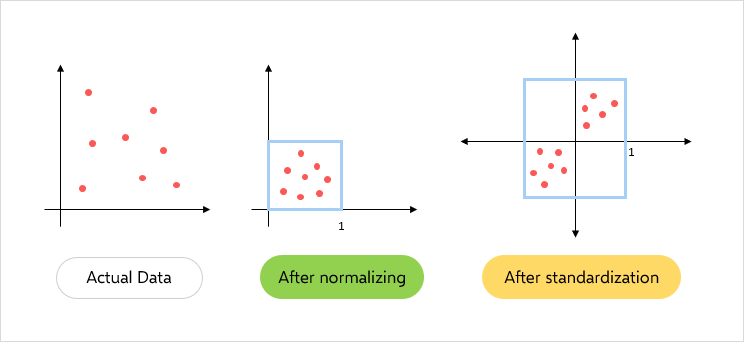

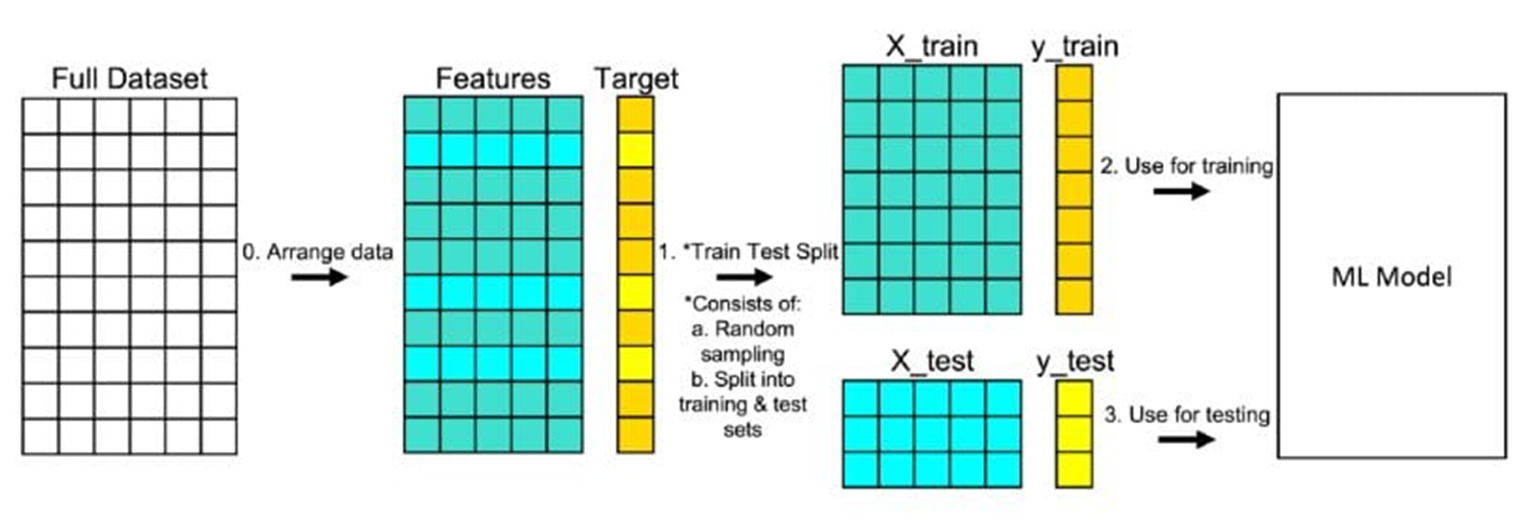

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

Bu kod bloğu, MNIST veri setindeki görüntülerin piksel değerlerini 0-255 aralığından 0-1 aralığına dönüştürmek için kullanılır. İlk iki satır, X_train ve X_test numpy dizilerinin veri türünü float32'ye dönüştürür. Sonraki iki satır, her pikselin maksimum değeri olan 255'e bölerek, her pikselin 0 ile 1 arasında bir ondalık sayı olarak temsil edilmesini sağlar. Bu, ağın daha iyi öğrenmesine yardımcı olabilir ve verilerin işlenmesi daha kolay hale gelir.

In [25]:
X_train[17]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
X_train[17].min()

0.0

In [27]:
X_train[17].max()

1.0

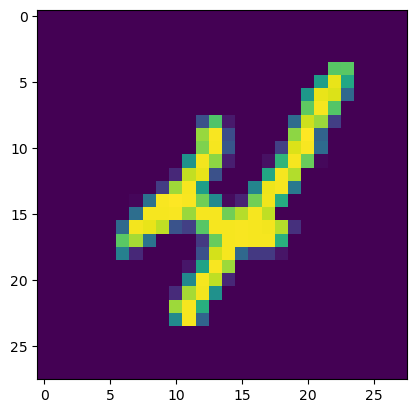

In [28]:
plt.imshow(X_train[9])

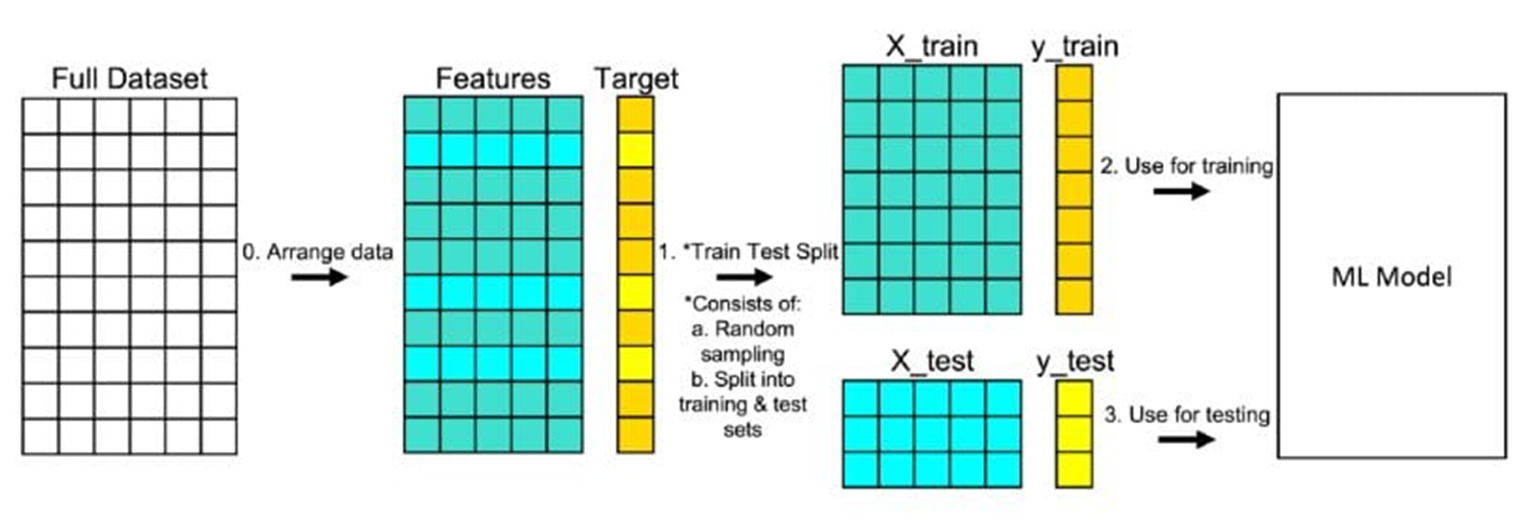

In [29]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


Yukarıdaki kod bloğu, MNIST veri setindeki görüntülerin boyutunu uygun şekilde yeniden şekillendirir. MNIST veri setindeki her bir resim, 28x28 piksel boyutundadır. Ancak, CNN modeli için, girdi olarak kullanılan verinin 3D tensör şeklinde olması gerektiği için, her bir resim 28x28x1 boyutunda bir tensöre dönüştürülür.

Bu işlem, reshape() fonksiyonu kullanılarak yapılır. Burada, X_train ve X_test dizileri, sırasıyla eğitim ve test verilerini içerir. X_train.shape[0] ve X_test.shape[0], her bir dizinin içindeki örnek sayısını temsil eder. Bu örneklerin her biri, 28x28 boyutunda bir resimdir.

reshape() fonksiyonunda, her bir örnek için yeni boyutlar belirtilir. X_train.shape[0] ve X_test.shape[0] kullanılarak, her bir dizideki örnek sayısı belirlenir. Yani, her bir örnek, 28x28x1 boyutunda bir tensöre dönüştürülür.

Sonuç olarak, X_train ve X_test dizileri, her biri 28x28x1 boyutunda 3D tensörler içerir. Bu tensörler, CNN modelinin girdi olarak kullanılabilecek uygun şekle sahiptir.

MNIST veri setindeki görüntüleri, konvolüsyonel sinir ağları (CNN) için uygun hale getirmek için kullanılır. reshape fonksiyonu, X_train ve X_test numpy dizilerindeki her bir görüntüyü, yükseklik ve genişlik boyutları 28x28 piksel olan ve yalnızca bir renk kanalı olan 4 boyutlu tensörlere dönüştürür.

Bu dönüşüm, CNN'lerin girdi olarak kabul ettiği tensör biçimine uymaktadır. 4 boyutlu tensörlerde ilk boyut, görüntü sayısını temsil eder, ikinci ve üçüncü boyutlar görüntü yüksekliği ve genişliğini temsil eder, dördüncü boyut ise her pikseldeki renk kanalı sayısını temsil eder (bu örnekte yalnızca 1 renk kanalı vardır).

In [30]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Eğer X_train, 28x28 boyutunda tek bir matris (shape=(60000, 28, 28)) olsaydı, onu bir CNN modeline sokmak mümkün olmazdı çünkü CNN modelleri 4 boyutlu bir veri yapısı beklerler. Bu nedenle, reshape işlemi yapılarak X_train, 4 boyutlu bir veri yapısı olan (60000, 28, 28, 1) şekline dönüştürülmüştür.

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
X_train[777].shape

(28, 28, 1)

In [33]:
from tensorflow.keras.utils import to_categorical

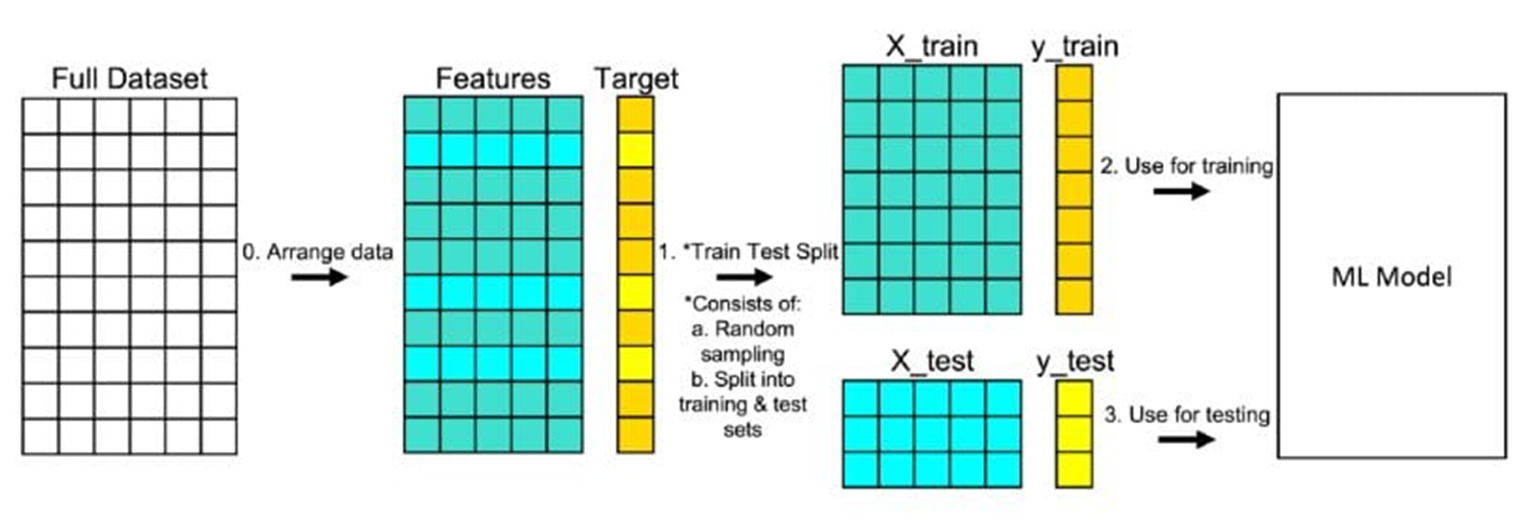

In [34]:
y_train[115]

4

In [35]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

Yukarıdaki kod bloğu, MNIST veri setindeki etiketleri (labels) uygun şekilde kodlamak için kullanılır. MNIST veri setindeki her bir resim, 0'dan 9'a kadar olan bir rakamı temsil eder. Bu rakamlar, eğitim ve test verilerinde sınıf etiketleri (class labels) olarak kullanılır.

Ancak, makine öğrenimi algoritmaları, sınıf etiketlerini doğrudan kullanmak yerine, genellikle vektörel formatta kodlanmış halleri ile çalışırlar. Bu nedenle, to_categorical() fonksiyonu kullanılarak, sınıf etiketleri, 10 boyutlu bir vektör olarak kodlanır.

Örneğin, bir resmin etiketi "5" ise, bu etiket to_categorical() fonksiyonu kullanılarak [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] şekline dönüştürülür. Burada, "5" rakamı 6. indekste bulunur ve bu indeks, 1 ile kodlanırken, diğer indeksler 0 ile kodlanır.

Bu şekilde kodlanmış sınıf etiketleri, Y_train ve Y_test dizilerinde saklanır. Bu diziler, sınıf etiketlerini vektör formatında tutarak, daha kolay bir şekilde işlenmelerini ve eğitim sürecinde kullanılmalarını sağlar.

Bu kod, y_train ve y_test etiketlerini (labels) ikili sınıf matrisine (binary class matrix) dönüştürüyor. Bu, çok sınıflı bir sınıflandırma problemi olduğunda kullanışlıdır. Burada 10 farklı sınıf olduğu için 10'a eşit bir şekilde 10 boyutlu bir matris oluşturuyor.

Yani, (10000, 10) şeklinde bir Y_test matrisi oluşacaktır.

to_categorical fonksiyonu, sınıflandırma problemlerinde kullanılan etiketleri (yani hedef değişkenleri) tek boyutlu tamsayı dizilerinden, her bir etiketin bir dizi içinde kodlandığı ikili (binary) formatına dönüştürür. Bu, çoklu sınıf sınıflandırma problemlerinde kullanılabilir ve bir sınıfın hangi sayıya karşılık geldiğini belirtmek için kullanılır. Örneğin, MNIST veri kümesinde, 0'dan 9'a kadar olan 10 rakamın sınıflandırılması yapılmaktadır. to_categorical fonksiyonu, bu 10 rakamın her birini 10 boyutlu bir vektörde göstererek ikili bir formata dönüştürür. Bu sayede, eğitim için kullanılan veri setindeki her örnek bir etiket olarak kullanılabilir ve ağ daha sonra her bir girdi örneği için doğru sınıfı tahmin etmeye çalışır.

Eğer verilerimizi kategorik yapmazsak, sınıflandırma modelimiz sayısal hedef değişkenlerle çalışacaktır. Bu durumda, modele sınıf etiketlerini direkt olarak vermek yerine sayısal bir değer vereceğiz ve modelimiz bu sayısal değerleri öğrenecek. Ancak, sınıf etiketleri sayısal değerlere çevrildiğinde, modelin bu sayıları birbirleriyle ilişkilendirme riski vardır. Örneğin, bir sinir ağı, sınıflar arasında bir sıralama olabileceğini ve bunu modelleyebileceğini düşünebilir.

Bu nedenle, sınıf etiketlerimizi kategorik hale getiriyoruz. Bu şekilde, sınıf etiketleri önceden tanımlanmış bir sayı değeri yerine, her sınıf için ayrı bir sütun kullanarak temsil edilir. Bu, modelin sınıfları sayısal değerlerle ilişkilendirmek yerine, her sınıfın ayrı bir etikete sahip olduğunu öğrenmesini sağlar ve modelin daha doğru sınıflandırmalar yapmasına yardımcı olur.


Eğer to_categorical() fonksiyonu kullanılmadan önce sınıf etiketleri doğrudan sayısal bir değer olarak saklanıyorsa, model bu değerleri sayı olarak değerlendirir ve sınıf etiketleri arasında bir doğrusal ilişki olduğunu varsayar. Bu, modelin sınıf etiketleri arasındaki ilişkileri yanlış yorumlamasına ve performansının düşmesine neden olabilir.

Örneğin, sınıf etiketleri "0", "1" ve "2" olan bir sınıflandırma problemi ele alalım. Eğer sınıf etiketleri doğrudan sayısal değer olarak saklanırsa, model bu sınıfları sayı olarak değerlendirecek ve aralarında doğrusal bir ilişki olduğunu varsayacaktır. Bu durumda, örneğin bir girdi resminin sınıf etiketi "1" iken modelin "0" veya "2" olarak tahmin etmesi daha olası hale gelebilir.

Bu nedenle, sınıf etiketleri one-hot encoding yöntemiyle kategorik değişkenlere dönüştürülür. Bu, modelin sınıf etiketlerinin birbirleriyle doğrusal bir ilişki içinde olmadığını ve her sınıfın kendine özgü bir etiket vektörü olduğunu anlamasını sağlar. Bu da modelin daha doğru ve tutarlı tahminler yapmasına olanak tanır.

In [36]:
Y_train[115]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
Y_train[715]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

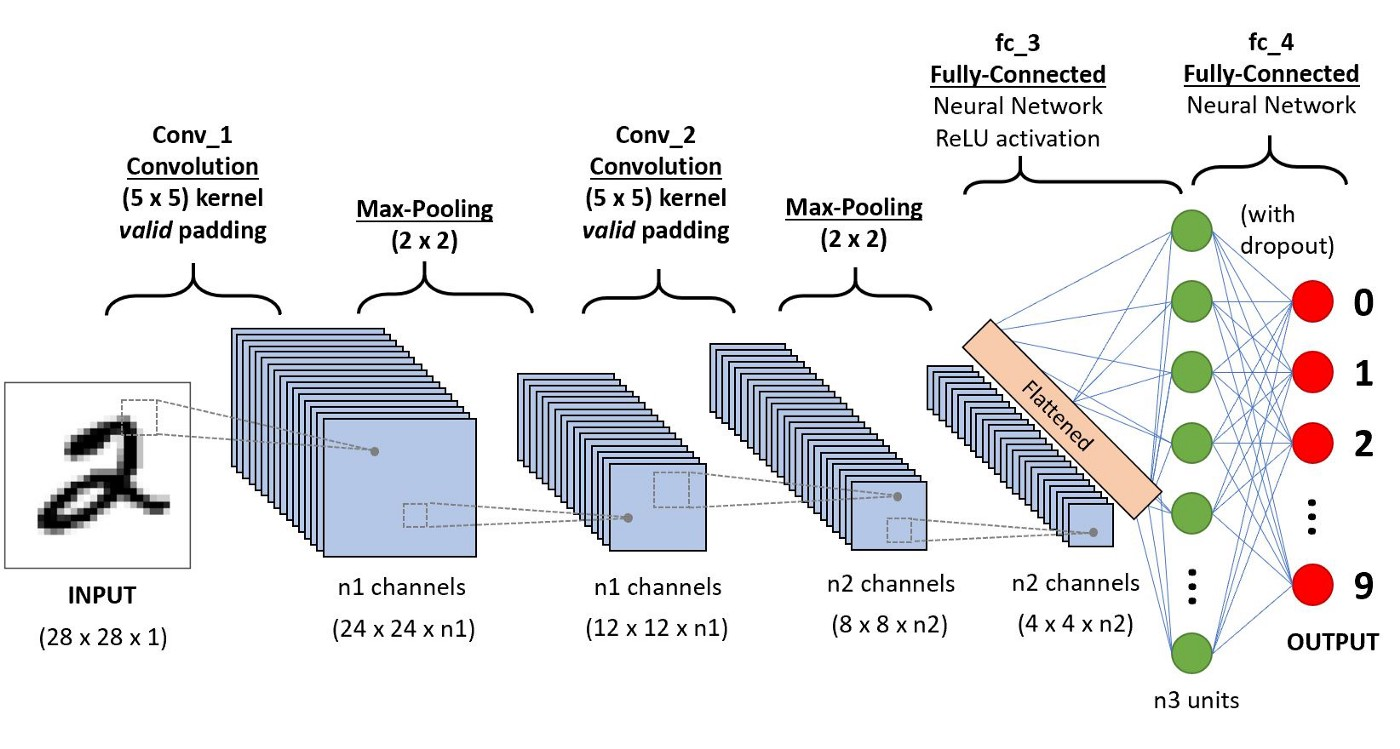

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.layers.normalization import BatchNormalization

ModuleNotFoundError: No module named 'keras.layers.normalization'

Burada "2D" ifadesi, iki boyutlu görüntüler üzerinde işlem yapacağımızı belirtmek için kullanılır. Yani, bu özellikle resim işleme uygulamalarında kullanılan Convolutional Neural Networks (CNN) için kullanılır. CNN'ler, 2D filtreleri kullanarak görüntü verilerinde özelliklerin çıkarılmasına izin veren bir derin öğrenme mimarisidir. Bu nedenle, CNN'ler genellikle 2D konvolüsyon, 2D Max Pooling ve 2D veri formatları kullanırlar.

Bu, sinir ağında kullanılacak verinin 2 boyutlu olduğunu gösterir. Bu durumda, veri 28x28 piksel boyutlarında olduğu için 2D olarak ifade edilir. 3D ifade, örneğin video gibi 3 boyutlu veri türleri için kullanılır.

In [39]:
model = Sequential() 

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

NameError: name 'BatchNormalization' is not defined

input_shape parametresi giriş veri boyutunu belirtmek için gereklidir. Modelin ilk katmanında bu parametre belirtilmezse, model eğitimi sırasında veri boyutu uyumsuzluğu hatası alınır. Bu nedenle, modelin ilk katmanında input_shape parametresi belirtilmelidir.

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

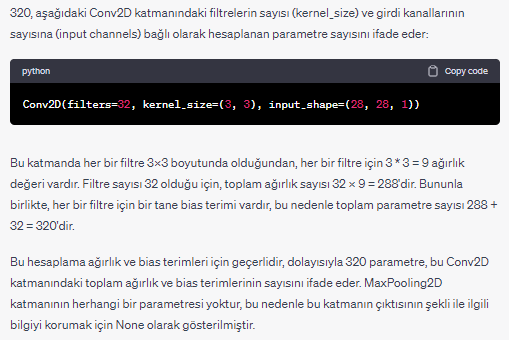

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

60.000/32

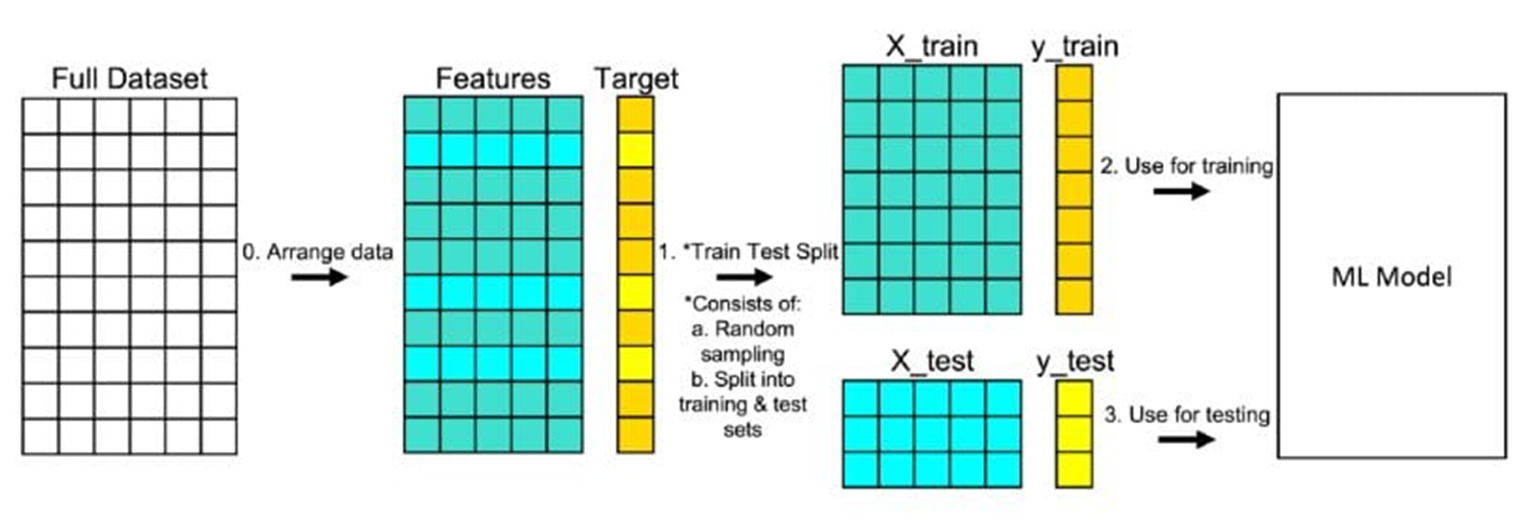

X_train ve Y_train kullanılarak model eğitildikten sonra, X_test ve Y_test verileri bu öğrenmenin performansını değerlendirmek için kullanılır. X_test verileri, modelin öğrendiği özellikleri kullanarak tahminler yapmasına ve gerçek etiketlerle karşılaştırmasına olanak tanır. Y_test verileri, doğru tahmin oranının hesaplanması için gerçek etiketler olarak kullanılır. Model, X_test verileri üzerindeki performansına göre, daha önce hiç görmediği yeni veriler üzerinde ne kadar iyi performans gösterebileceği hakkında fikir verebilir.

In [43]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/5
1875/1875 [==============================] - 36s 18ms/step - loss: 0.1581 - accuracy: 0.9528 - val_loss: 0.0641 - val_accuracy: 0.9781
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0541 - accuracy: 0.9835 - val_loss: 0.0484 - val_accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0439 - val_accuracy: 0.9863
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0449 - val_accuracy: 0.9846
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0490 - val_accuracy: 0.9842


Batch size belirtilmediğinde varsayılan olarak 32 kullanılır. Bu nedenle batch_size=32 yerine batch_size=None yazılsa bile sonuçta aynı batch size kullanılacaktır. Ancak, bu belirsizliğe neden olduğundan, batch size'ı belirtilmesi önerilir.

In [44]:
model.metrics_names  # Modelde kullanilan metrikler

['loss', 'accuracy']

In [45]:
model.history.history   # Modelin egitimdeki loss ve accuracy history' si 

{'loss': [0.15809111297130585,
  0.05414876341819763,
  0.03555333986878395,
  0.022936608642339706,
  0.016065826639533043],
 'accuracy': [0.9528166651725769,
  0.9835333228111267,
  0.9889833331108093,
  0.9926333427429199,
  0.9947166442871094],
 'val_loss': [0.0640997588634491,
  0.04842260479927063,
  0.04394865781068802,
  0.044898588210344315,
  0.049043428152799606],
 'val_accuracy': [0.9781000018119812,
  0.9836999773979187,
  0.986299991607666,
  0.9846000075340271,
  0.9842000007629395]}

In [46]:
summary = pd.DataFrame(model.history.history)
summary.head()

loss  accuracy  val_loss  val_accuracy
0  0.158091  0.952817  0.064100        0.9781
1  0.054149  0.983533  0.048423        0.9837
2  0.035553  0.988983  0.043949        0.9863
3  0.022937  0.992633  0.044899        0.9846
4  0.016066  0.994717  0.049043        0.9842

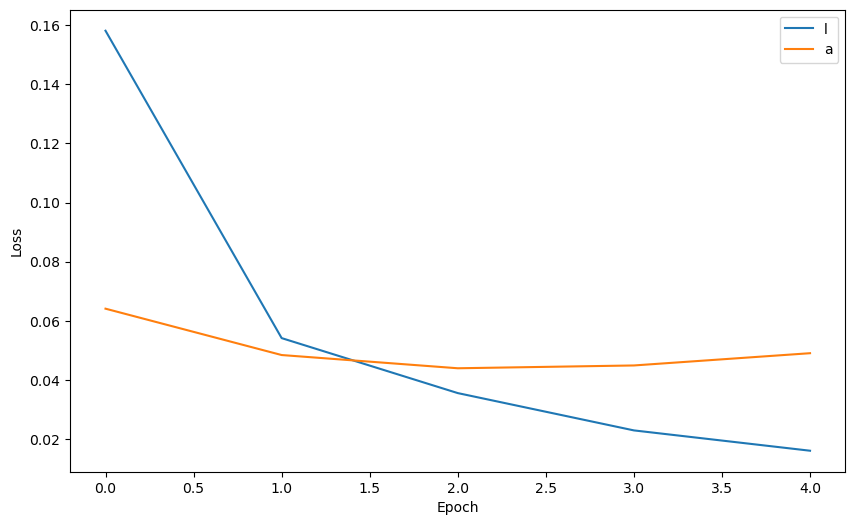

In [47]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)              # DataFrame' den cekilen loss degerleri
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

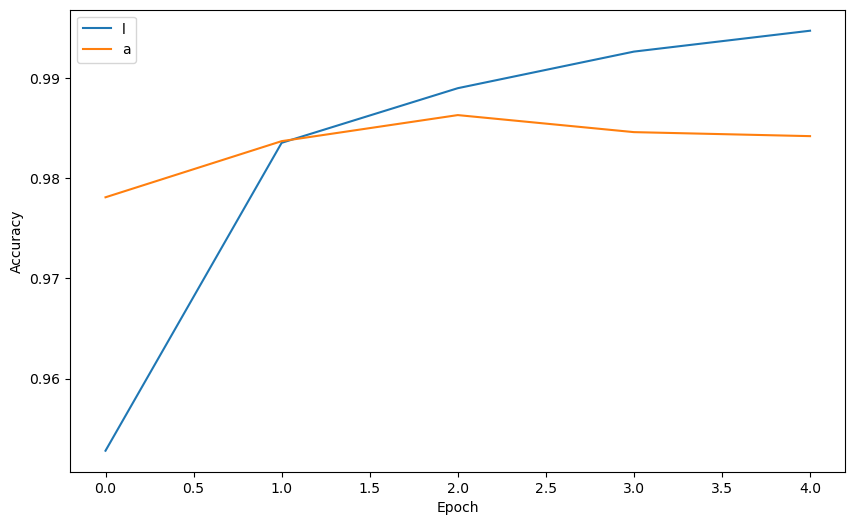

In [48]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        # DataFrame' den cekilen accuracy degerleri
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

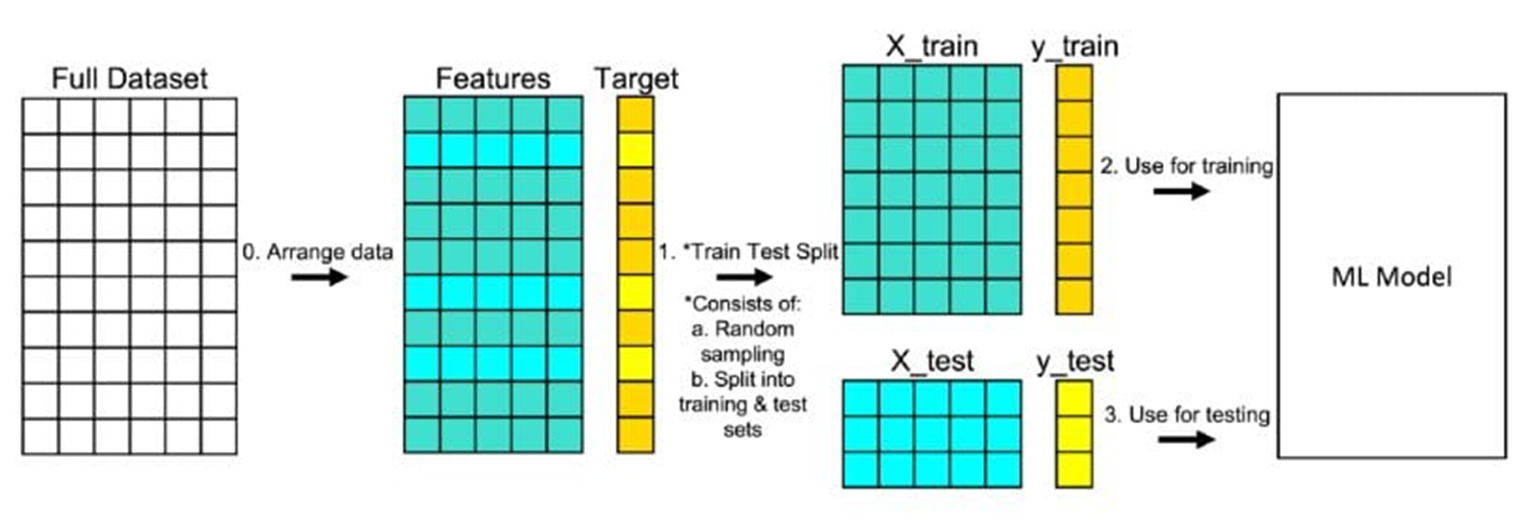

In [49]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 2s 5ms/step - loss: 0.0490 - accuracy: 0.9842
[0.049043428152799606, 0.9842000007629395]


model.evaluate() fonksiyonu, modelin test setindeki performansını hesaplar. Bu fonksiyona test seti verileri (X_test) ve gerçek etiketleri (Y_test) parametre olarak verilir. Fonksiyon, iki değer döndürür: test seti üzerindeki kayıp (loss) ve doğruluk (accuracy) oranı.

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
preds = model.predict(X_test)
preds

313/313 [==============================] - 2s 5ms/step


array([[2.1716675e-09, 7.8890157e-09, 2.0808618e-07, ..., 9.9999857e-01,
        1.6363165e-07, 9.2419219e-07],
       [5.2205923e-10, 4.2202341e-04, 9.9957794e-01, ..., 2.1552341e-12,
        8.5869672e-10, 1.1101283e-09],
       [9.0603635e-07, 9.9969304e-01, 6.9466000e-06, ..., 3.8263657e-05,
        1.2015023e-04, 1.2121262e-06],
       ...,
       [1.0610914e-15, 1.4819256e-10, 2.0721561e-13, ..., 2.3687358e-08,
        1.1617798e-06, 2.1584036e-07],
       [9.3028477e-14, 1.3925304e-13, 2.3120650e-14, ..., 1.2515594e-11,
        1.8127649e-06, 3.4524070e-10],
       [1.0888058e-10, 1.0952780e-09, 1.0112813e-09, ..., 1.9734207e-13,
        4.8448701e-08, 4.0236993e-12]], dtype=float32)

preds değişkeni, modelimiz tarafından tahmin edilen test veri setindeki her bir görüntünün sınıf tahminlerini içeren bir numpy dizisidir. Yani, her bir test görüntüsü için, modelimiz tarafından öngörülen sınıfın olasılıklarını gösterir.

In [54]:
preds[0]

array([2.1716675e-09, 7.8890157e-09, 2.0808618e-07, 8.5851525e-08,
       3.0855007e-10, 2.3421207e-09, 2.0429856e-13, 9.9999857e-01,
       1.6363165e-07, 9.2419219e-07], dtype=float32)

9.9999964e-01: Sekizinci sınıfın tahmini olasılık değeri. Bu değer çok yüksektir, bu nedenle model bu sınıfı büyük bir olasılıkla tahmin ediyor.

"9.9999964e-01" ifadesindeki "e" veya "E" harfi, bilimsel gösterimde üs (exponent) işaretini temsil eder. Bu gösterimde bir sayının büyüklüğünü daha kompakt bir şekilde ifade etmek için kullanılır.

Yani, "9.9999964e-01" ifadesi aslında "0.99999964" değerini ifade eder. Bu, yaklaşık olarak 1'e çok yakın bir değerdir. Bu nedenle, bu değer neredeyse tam olarak 1'dir.

In [55]:
preds[1]

array([5.2205923e-10, 4.2202341e-04, 9.9957794e-01, 1.3407622e-09,
       2.3155824e-09, 3.1691571e-13, 2.9679856e-09, 2.1552341e-12,
       8.5869672e-10, 1.1101283e-09], dtype=float32)

In [56]:
predictions= np.argmax(preds, axis=1)


predictions adlı değişkene, preds adlı numpy dizisindeki en yüksek olasılığa sahip sınıfın indeksleri atanıyor. axis=1 parametresi, argmax işleminin sütunlara göre (yani her örnekteki sınıf olasılıklarının karşılaştırılması) yapılacağını belirtir. Sonuç olarak, predictions dizisi, preds dizisindeki her örnek için en yüksek olasılığa sahip sınıfın indekslerini içerir.

In [57]:
len(predictions)

10000

In [58]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [59]:
print(predictions[:300])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 2 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 5 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 2 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8]


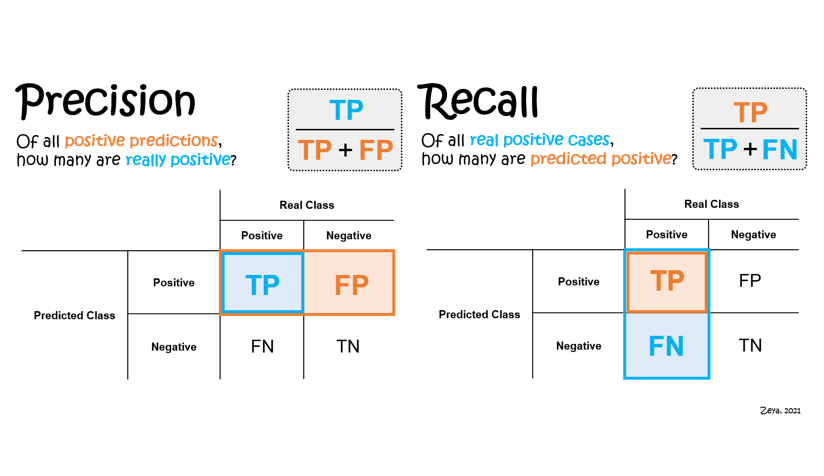

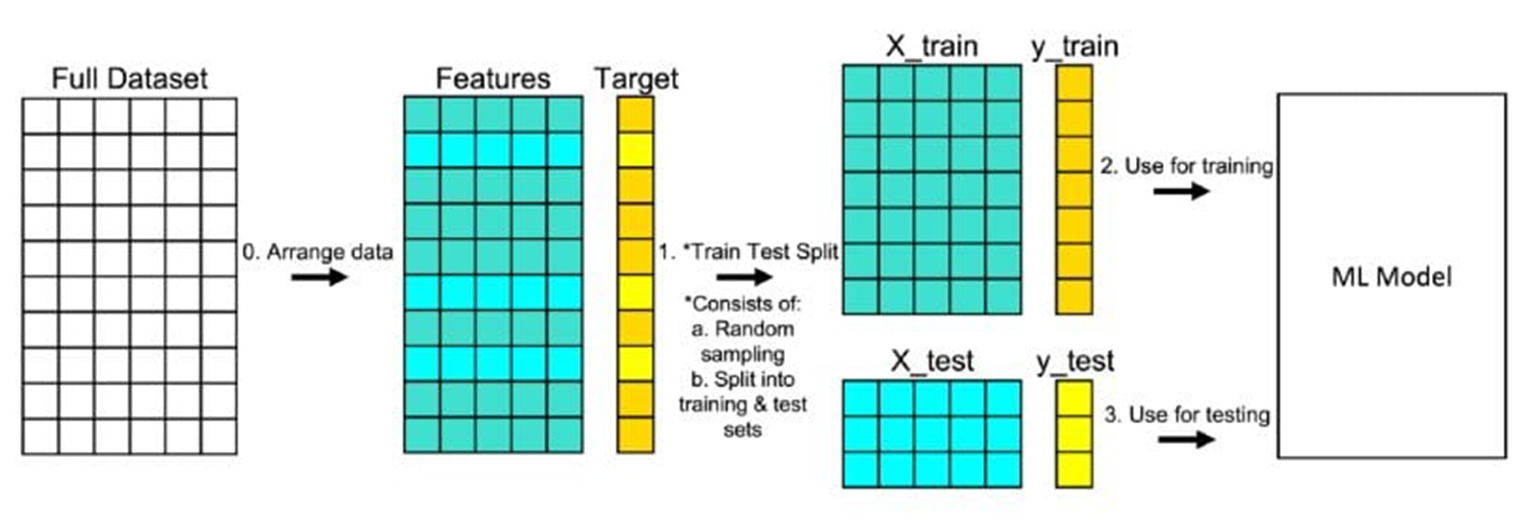

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       1.00      0.97      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [61]:
print(confusion_matrix(y_test, predictions))

[[ 968    0    3    0    1    1    2    1    3    1]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    6 1012    0    1    0    2    8    2    1]
 [   0    1    3  980    0   10    0    3    3   10]
 [   0    1    3    0  962    0    0    0    1   15]
 [   1    0    0    2    0  883    2    0    1    3]
 [   6    3    1    0    1    6  935    0    6    0]
 [   0    2    5    0    0    0    0 1011    2    8]
 [   3    0    3    0    0    1    1    2  960    4]
 [   0    1    0    1    6    2    0    1    2  996]]


In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.049043428152799606
Test accuracy: 0.9842000007629395


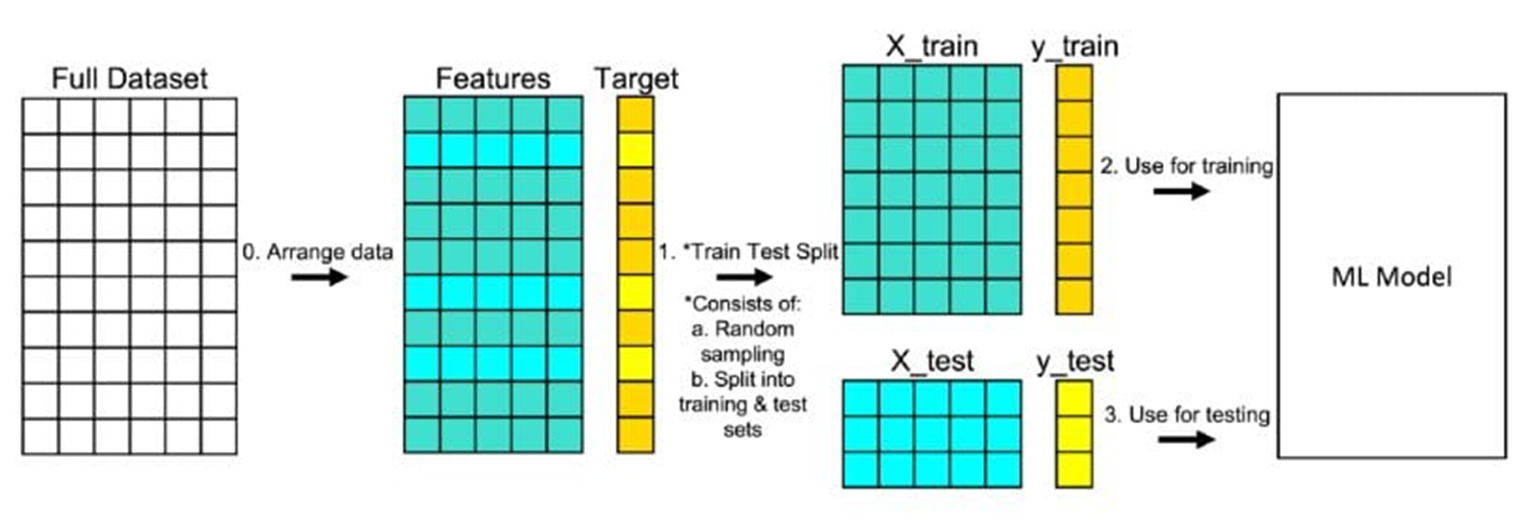

In [63]:
my_number = X_test[120]

In [64]:
my_number.shape

(28, 28, 1)

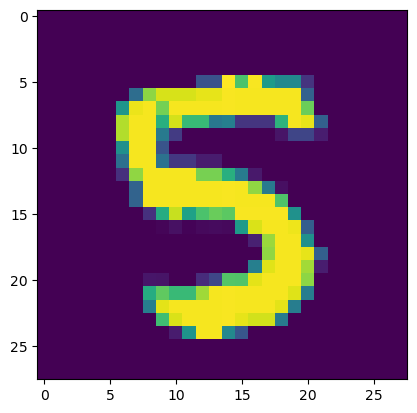

In [65]:
plt.imshow(my_number); 

In [66]:
model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 37ms/step


array([[1.3801645e-18, 1.2445950e-12, 3.1501067e-14, 2.2928940e-07,
        1.4084996e-15, 9.9987757e-01, 1.5671781e-13, 2.0635471e-14,
        2.3907296e-08, 1.2211666e-04]], dtype=float32)

Baştaki 1 sayısı, modelin kaç örneği işlediğini ifade eder. Bu sayıyı değiştirmek, modelin ne kadar veri üzerinde tahmin yapacağını belirler.

Eğer bu sayıyı 5 olarak ayarlarsanız, model beş ayrı örnek üzerinde tahmin yapar. Yani, beş farklı giriş örneği model tarafından işlenir ve her biri için ayrı tahmin sonuçları üretilir. Bu nedenle çıktı, beş ayrı tahmin sonucunu içerecektir.

model.predict(my_number.reshape(5, 28, 28, 1))

Yukarıdaki kod, "my_number" adlı giriş örneğini beş ayrı örnek olarak kabul eder ve modeli bu beş örnek üzerinde çalıştırır. Sonuç olarak, beş farklı tahmin sonucu elde edilir. Bu, modelin birden çok örnekle aynı anda çalıştırılmasına olanak tanır.


In [123]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([5], dtype=int64)

In [68]:
model.save("cnn-1.h5_Batch_150")

INFO:tensorflow:Assets written to: cnn-1.h5_Batch_150\assets


INFO:tensorflow:Assets written to: cnn-1.h5_Batch_150\assets


In [69]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

# MNIST verisetini yükle
(_, _), (X_test, y_test) = mnist.load_data()

# Modeli yükle
model = load_model("cnn-1.h5_Batch_150")

# Örnek veri seç ve modelimizden tahmin al
idx = np.random.randint(0, X_test.shape[0])
sample = X_test[idx]
prediction = model.predict(sample.reshape(1, 28, 28, 1))

# Tahmin sonucunu ekrana yazdır
print(f"Gerçek Etiket: {y_test[idx]}")
print(f"Tahmin Edilen Etiket: {np.argmax(prediction)}")


1/1 [==============================] - 0s 102ms/step
Gerçek Etiket: 9
Tahmin Edilen Etiket: 9


Bu Python kodu, MNIST veri kümesinden örnek bir rakam görüntüsünü seçen ve bir önceden eğitilmiş bir evrişimli sinir ağı (CNN) modelini kullanarak bu görüntüyü sınıflandıran bir programı temsil eder. İşte her bir bölümün ayrıntılı açıklamaları:

import numpy as np: NumPy kütüphanesini içe aktarır. NumPy, çok boyutlu dizileri işlemek ve bilimsel hesaplamalar yapmak için kullanılır.

from tensorflow.keras.models import load_model: TensorFlow kütüphanesinden, Keras aracılığıyla eğitilmiş bir modeli yüklemek için load_model fonksiyonunu içe aktarır.

from tensorflow.keras.datasets import mnist: TensorFlow ve Keras tarafından sağlanan MNIST veri kümesini içe aktarır. Bu veri kümesi, rakam tanıma modeli eğitimi için sıkça kullanılır.

(_, _), (X_test, y_test) = mnist.load_data(): MNIST veri kümesini yükler ve eğitim verilerini (X_test ve y_test) ayırır. İlk çizgi, eğitim verilerini içerirken ikinci çizgi, test verilerini içerir. Bu örnekte sadece test verileri kullanılıyor.

model = load_model("cnn-1.h5_Batch_150"): Önceden eğitilmiş bir CNN modelini yükler. Model dosyası "cnn-1.h5_Batch_150" adıyla kaydedilmiştir ve bu kod modeli yükler.

idx = np.random.randint(0, X_test.shape[0]): Rastgele bir indeks seçer. Bu, test verileri içinde rastgele bir görüntü seçmek için kullanılacaktır.

sample = X_test[idx]: Seçilen rastgele görüntüyü sample adlı bir değişkene atar.

prediction = model.predict(sample.reshape(1, 28, 28, 1)): Modeli kullanarak seçilen görüntü üzerinde bir tahmin yapar. Görüntü, modelin beklentilerine uygun bir şekilde yeniden boyutlandırılır ve ardından model.predict ile tahmin edilir.

print(f"Gerçek Etiket: {y_test[idx]}"): Seçilen görüntünün gerçek etiketini ekrana yazdırır. MNIST veri kümesi, her görüntüye karşılık gelen bir etiket içerir.

print(f"Tahmin Edilen Etiket: {np.argmax(prediction)}"): Modelin tahmin ettiği etiketi ekrana yazdırır. np.argmax işlevi, tahmin sonucu dizisinde en yüksek olasılığa sahip olan indeksi alır ve tahmin edilen etiketi verir.

Sonuç olarak, bu kod, önceden eğitilmiş bir CNN modelini kullanarak MNIST veri kümesinden rastgele bir rakam görüntüsünün sınıflandırılmasını gösterir ve gerçek ve tahmin edilen etiketleri ekrana yazdırır.

Bu kod bloğunu çalıştırdığımızda, rastgele bir resim seçilir, bu resim modelimize verilir ve modelimizden tahmin alınır. Sonuç olarak gerçek etiket ve tahmin edilen etiket ekrana yazdırılır.

Bu kod önce X_test'den rastgele bir örnek (sample) seçer, ardından bu örneği modelin girdi şekline (input shape) uygun olarak yeniden boyutlandırır. Daha sonra predict() fonksiyonunu kullanarak bu örneğin sınıf tahminini alır.

In [126]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\two.png").convert('L')
image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Modeli yükleyin ve tahmin yapın
model = tf.keras.models.load_model('cnn-1.h5_Batch_150')
prediction = model.predict(image_array)

# Tahmin edilen sayıyı ekrana yazdırın
print(np.argmax(prediction))

0


İlk adımda, kod, Python Imaging Library (PIL) modülünün "Image" sınıfını içe aktarır. Bu modül, görüntü işleme işlevleri sağlar.

Ardından, NumPy kütüphanesini "np" kısaltmasıyla içe aktarır. NumPy, çok boyutlu dizileri işlemek için kullanılır.

TensorFlow kütüphanesini "tf" kısaltmasıyla içe aktarır. TensorFlow, derin öğrenme modelleri oluşturmak ve eğitmek için kullanılan bir kütüphanedir.

image = Image.open("C:\\Users\\LENOVO\\Desktop\\two.png").convert('L') kod satırı, belirtilen dosya yolundan bir görüntü açar ve convert yöntemi ile görüntüyü gri tonlamalı bir formata dönüştürür. "convert('L')" işlemi, görüntüyü siyah-beyaz yapar ve her pikselin yalnızca parlaklık (luminance) değerini kullanır.

image = image.resize((28, 28)) kodu, görüntüyü 28x28 piksel boyutlarına yeniden boyutlandırır. Bu işlem, modelin beklentilerine uygun bir giriş boyutu sağlar.

image_array = np.array(image) kodu, görüntüyü bir NumPy dizisine dönüştürür. Bu, görüntüyü daha sonra model tarafından işlenebilir hale getirir.

image_array = image_array.reshape(1, 28, 28, 1) kodu, görüntüyü modelin beklentilerine uygun bir şekle dönüştürür. Daha spesifik olarak, bu, görüntüyü tek bir örnek içeren bir diziye dönüştürür ve bu dizi 28x28 piksel boyutlarına ve bir gri tonlu kanala sahip bir görüntüyü temsil eder.

model = tf.keras.models.load_model('cnn-1.h5_Batch_150') kodu, önceden eğitilmiş bir TensorFlow modelini yükler. Modelin ağırlıkları ve yapısı, "cnn-1.h5_Batch_150" adlı dosyadan yüklenir.

prediction = model.predict(image_array) kodu, yüklenen modeli kullanarak görüntüyü tahmin etmek için "predict" metodunu kullanır. Bu işlem, modelin verilen görüntüyü işleyerek tahminlerde bulunmasını sağlar.

print(np.argmax(prediction)) kodu, tahmin sonucunu ekrana yazdırır. Tahmin sonucu, model tarafından tahmin edilen sayının indeksini içeren bir dizi olarak gelir. np.argmax işlevi, bu diziden en yüksek değere sahip indeksi bulur ve tahmin edilen sayıyı verir. Bu tahmin sonucu ekrana yazdırılır.

In [127]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\eight.jpg").convert('L')
image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Modeli yükleyin ve tahmin yapın
model = tf.keras.models.load_model('cnn-1.h5_Batch_150')
prediction = model.predict(image_array)

# Tahmin edilen sayıyı ekrana yazdırın
print(np.argmax(prediction))

8


In [128]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("C:\\Users\\LENOVO\\Desktop\\one.png").convert('L')
image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Modeli yükleyin ve tahmin yapın
model = tf.keras.models.load_model('cnn-1.h5_Batch_150')
prediction = model.predict(image_array)

# Tahmin edilen sayıyı ekrana yazdırın
print(np.argmax(prediction))

1
